In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay

In [3]:
# Read in processed data
file_path = '/Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj1/data/processed_data/processed_project_adult.csv'
data = pd.read_csv(file_path, index_col=0)

# Separate target values
X = data.drop(columns=['income'], axis=1)
y = data[['income']]

# Split data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

## Logistic regression

### Initial model implementation

In [4]:
# Initialize the model with default parameters
model = LogisticRegression(solver='lbfgs', random_state=42, max_iter=200)
model.fit(X_train, y_train.values.ravel())

# Make predictions on the scaled test set
y_pred = model.predict(X_test)

In [5]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Final accuracy on test set: {accuracy:.4f}")

Final accuracy on test set: 0.8254


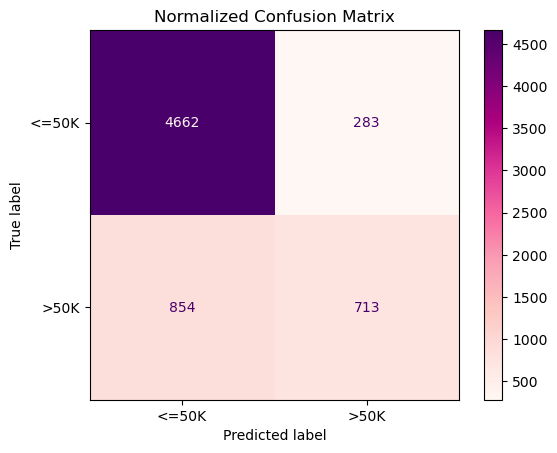

In [6]:
disp = ConfusionMatrixDisplay.from_estimator(
    model,          # your trained model
    X_test,              # test features
    y_test,              # test labels
    display_labels=np.unique(y_test),  # or custom class names like ["<=50K", ">50K"]
    cmap=plt.cm.RdPu     # normalize rows to proportions
)

plt.title('Normalized Confusion Matrix')
plt.show()

In [7]:
# Generate classification report

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))



--- Classification Report ---
              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      4945
        >50K       0.72      0.46      0.56      1567

    accuracy                           0.83      6512
   macro avg       0.78      0.70      0.72      6512
weighted avg       0.81      0.83      0.81      6512



### Hyperparameter tuning

In [ ]:

# Define the parameter grid to search over.
param_grid = {
    'C': np.logspace(-4, 4, 20),  # Inverse of regularization strength
}

# Initialize GridSearchCV with a 5-fold cross-validation strategy.
grid_search = GridSearchCV(
    estimator=LogisticRegression(solver='lbfgs', random_state=42, max_iter=500),
    param_grid=param_grid,
    cv=5,                     # 5-fold cross-validation
    scoring='accuracy',       # Metric to optimize for
    n_jobs=-1,                # Use all available CPU cores
    verbose=1                 # Print progress
)

grid_search.fit(X_train, y_train.values.ravel())

# Get the best estimator from the search.
best_model = grid_search.best_estimator_

print("\n--- Best Model Found by GridSearchCV ---")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

print("\n Final evaluation of the best model on the test set...")
# Predict using the best model found during the search.
final_y_pred = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_y_pred)


Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- Best Model Found by GridSearchCV ---
Best parameters: {'C': 0.615848211066026}
Best cross-validation accuracy: 0.8258

 Final evaluation of the best model on the test set...


In [9]:
print(f"Final accuracy on test set: {final_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, final_y_pred))

Final accuracy on test set: 0.8254

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      4945
        >50K       0.72      0.46      0.56      1567

    accuracy                           0.83      6512
   macro avg       0.78      0.70      0.72      6512
weighted avg       0.81      0.83      0.81      6512



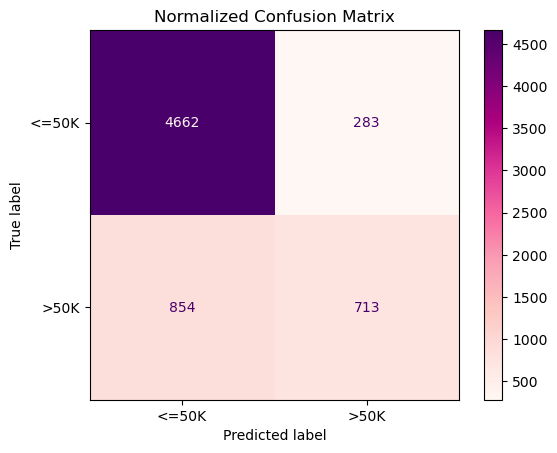

In [10]:
disp = ConfusionMatrixDisplay.from_estimator(
    best_model,
    X_test,
    y_test,
    display_labels=np.unique(y_test),  
    cmap=plt.cm.RdPu    # normalize rows to proportions
)

plt.title('Normalized Confusion Matrix')
plt.show()